# Ensemble Techniques

Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results. The main hypothesis is that weak models are correctly combined we can obtain more accurate and/or robust models.

There are two types of ensemble Techniques:

* Bagging:- often consider as homogeneous weak learners learns them independently from each other in a parallel and combines them following some kind of deterministic average process.
    - Random Forest Classifier
    - Extra Trees

* Boosting:- often considers homogeneous weak learners, learns them sequentially in a very adaptive way (a base model depends on the previous ones and combines them following a deterministic strategy
    - AdaBoost
    - Gradient Boosting                                                                                                     
    
**N.B.** Bagging and Boosting works with homogeneous (same) models .....Generally **DecisionTree**

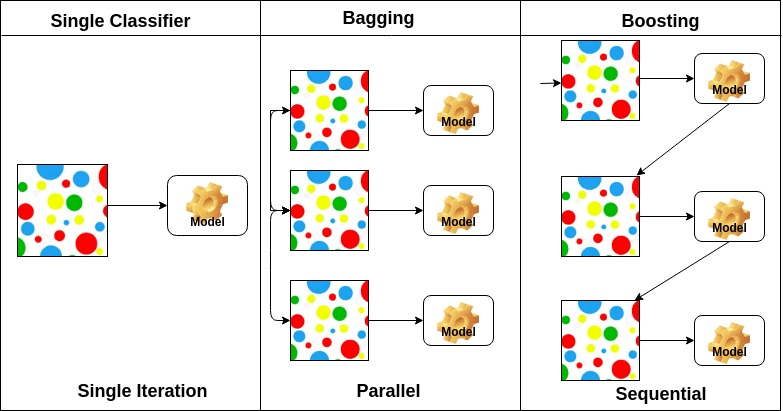

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading Dataset

iris = load_iris()
x = iris.data[:,:4]
y = iris.target

#train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .20, random_state = 42)

## Bagging

###  Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #n_estimators =100 is by default
rf.fit(xtrain,ytrain)
predrf = rf.predict(xtest)
print("Accuracy Score :", accuracy_score(ytest,predrf))
print("Confusion Matrix : \n", confusion_matrix(ytest,predrf))
print("Classification Report : \n", classification_report(ytest,predrf))

Accuracy Score : 1.0
Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Extra Trees Classifier

It is only used for massive datasets

## Boosting

### AdaBoost Classifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier

#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(xtrain,ytrain)
predad = ad.predict(xtest)
print("Accuracy Score :", accuracy_score(ytest,predad))
print("Confusion Matrix : \n", confusion_matrix(ytest,predad))
print("Classification Report : \n", classification_report(ytest,predad))

Accuracy Score : 1.0
Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Changing the default estimator DTC with SVC in AdaBoost Classifier** 

In [10]:
#Import SVC (Support Vector Classifier)
from sklearn.svm import SVC
svc = SVC()

#Create adaboost classifier object
ad = AdaBoostClassifier(base_estimator= svc, n_estimators=50, algorithm ="SAMME") #another algorithm is 'SAMME.R' it will be default
ad.fit(xtrain,ytrain)
ad.fit(xtrain,ytrain)
predad = ad.predict(xtest)
print("Accuracy Score :", accuracy_score(ytest,predad))
print("Confusion Matrix : \n", confusion_matrix(ytest,predad))
print("Classification Report : \n", classification_report(ytest,predad))

Accuracy Score : 0.3
Confusion Matrix : 
 [[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



In [11]:
#Import SVC (Support Vector Classifier)
from sklearn.svm import SVC
svc = SVC(probability=True, kernel='linear')

#Create adaboost classifier object
ad = AdaBoostClassifier(base_estimator= svc, n_estimators=50, algorithm ="SAMME.R") #Here SAMME.R will be used as alogorithm
ad.fit(xtrain,ytrain)
ad.fit(xtrain,ytrain)
predad = ad.predict(xtest)
print("Accuracy Score :", accuracy_score(ytest,predad))
print("Confusion Matrix : \n", confusion_matrix(ytest,predad))
print("Classification Report : \n", classification_report(ytest,predad))

Accuracy Score : 1.0
Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
predgb = ad.predict(xtest)
print("Accuracy Score :", accuracy_score(ytest,predgb))
print("Confusion Matrix : \n", confusion_matrix(ytest,predgb))
print("Classification Report : \n", classification_report(ytest,predgb))

Accuracy Score : 1.0
Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Voting Classifiers

A voting classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of choosen class as output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each of them, we created a single model which trains by these models and preditcs output based on their combined majority of voting each output class.

Voting Classifier supports two types of voting:

* **Hard Voting:-** In Hard Voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of theclassifiers. Suppose three classifiers the output class (A, A, B), so here the majority predicted **A** as output. Hence, A will be the final prediction.

* **Soft Voting:-** In Soft Voting, the output class is the prediction based on the average of probability given to the class. Suppose given some input to three models, the prediction probability for class A = (0.30,0.47,0.53) and B =(0.20,0.32,0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [14]:
# Importing library

from sklearn.ensemble import VotingClassifier

In [16]:
#group/ ensemble of models

estimator =[]
estimator.append(('LR', KNeighborsClassifier()))
estimator.append(('SVC', SVC(gamma = 'auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [17]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

### Hard Voting

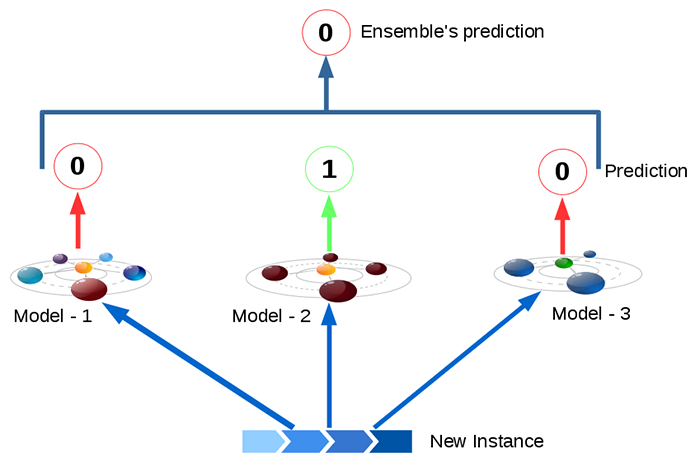

In [20]:
#Voting CLassifier with Hard Voting:

vot_hard = VotingClassifier(estimators = estimator, voting = 'hard')
vot_hard.fit(xtrain,ytrain)
ypred = vot_hard.predict(xtest)
print(ypred)

#using the accuracy_score(y_test, ypred)
score = accuracy_score(ytest, ypred)
print("Hard Voting % d" % score)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Hard Voting  1


### Soft Voting

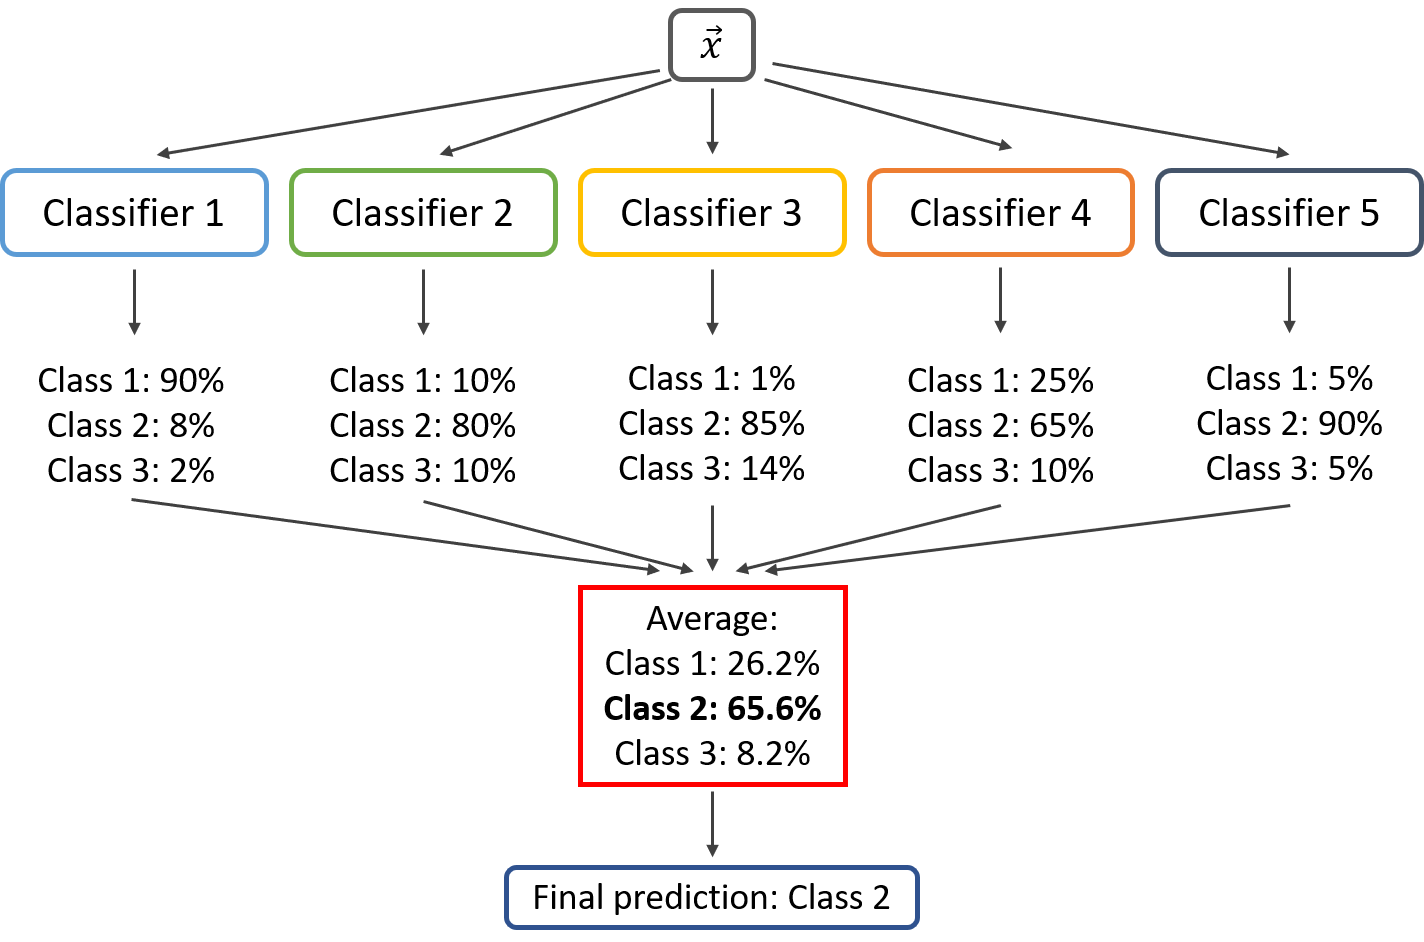

In [21]:
#Voting CLassifier with Soft Voting:

vot_soft = VotingClassifier(estimators = estimator, voting = 'soft')
vot_soft.fit(xtrain,ytrain)
ypred = vot_soft.predict(xtest)
print(ypred)

#using the accuracy_score(y_test, ypred)
score = accuracy_score(ytest, ypred)
print("Soft Voting % d" % score)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Soft Voting  1
